## Read Me
**Author**: Chong Zan Kai

**Email**: zkchong@gmail.com, zankai.chong@ada-asia.com

**Date**: 15-July-2018

**Description**: This notebook demonstrates a simple transfer learning technique, named Easy Adaptation from Daumé III, H. (2009).

Daumé III, H. (2009). Frustratingly easy domain adaptation. arXiv preprint arXiv:0907.1815.(https://arxiv.org/abs/0907.1815)

source: https://github.com/zkchong/easy-adaptation

In [8]:
#
# Import the necessary libraries
#
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification


In [9]:
np.random.seed(42)

In [10]:
#
# Create the artificial sample.
#
X, y = make_classification(n_samples = 200, 
                           n_features = 3, 
                           n_redundant = 0, 
                           n_informative = 2,
                           n_clusters_per_class = 1, 
                           n_classes = 3)

# Converet to dataframe
X_df = pd.DataFrame(X, columns = ['x%d' % x for x in range( X.shape[1])] )
y_df = pd.DataFrame(y, columns = ['y'] )

In [11]:
X_df

,x0,x1,x2
0,2.994623,-0.621546,0.120296
1,-1.138488,-2.331900,1.876796
2,1.766480,1.719833,1.523124
3,0.078799,-0.448911,0.074095
4,1.196672,-0.581615,-0.939880
...,...,...,...
195,-0.091225,-0.596665,-1.059214
196,4.484226,3.584256,-0.050238
197,-0.747792,-0.778554,-1.478586
198,0.622201,-3.121909,-0.530501


In [12]:
y_df

,y
0,0
1,2
2,1
3,0
4,0
...,...
195,0
196,1
197,2
198,0


<IPython.core.display.Javascript object>


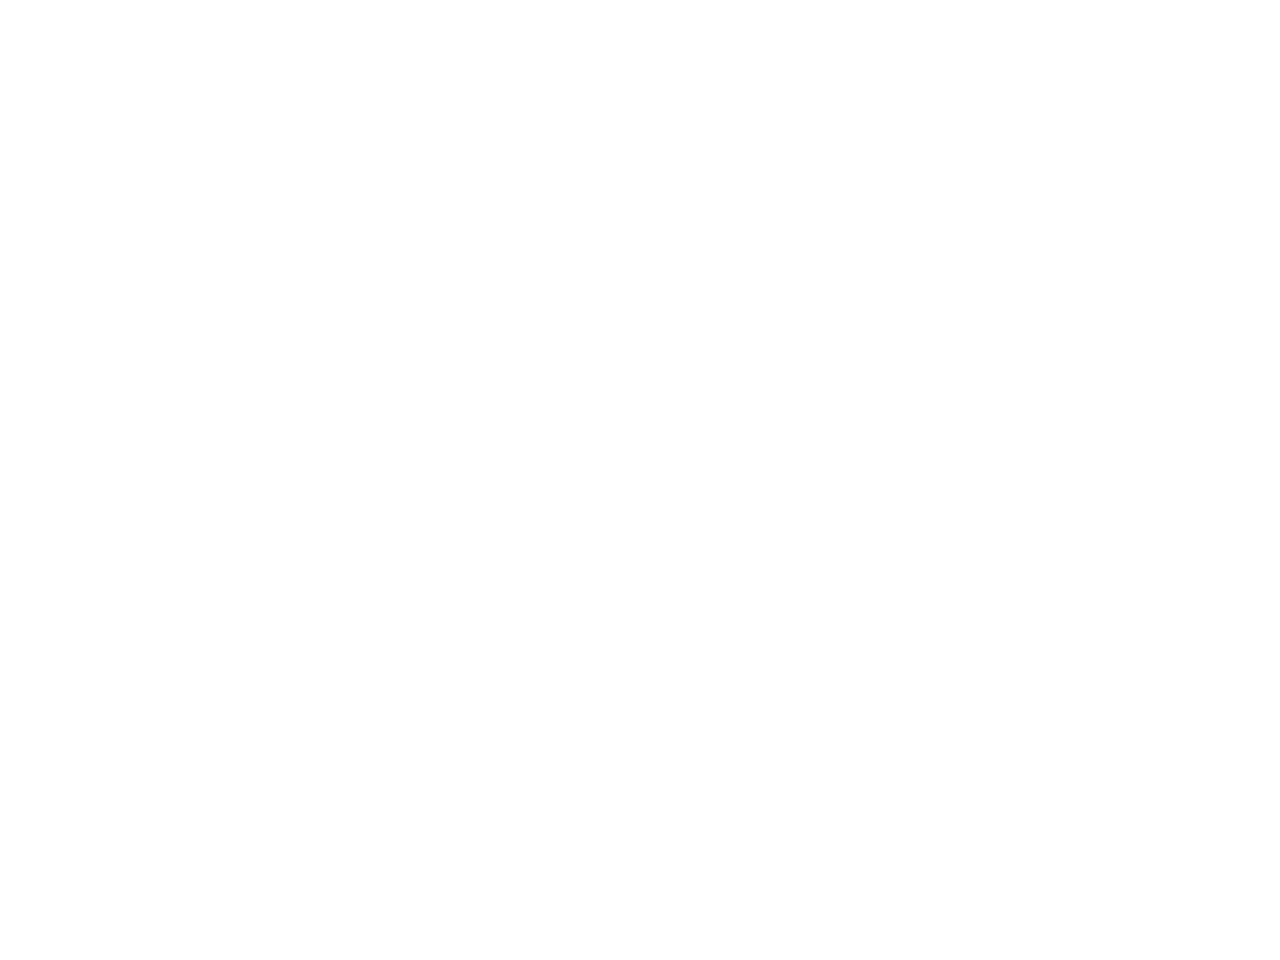

In [13]:
# Visualize in graph
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_df[(y_df.y == 0)]['x0'], 
           X_df[(y_df.y == 0)]['x1'], 
           X_df[(y_df.y == 0)]['x2'], 
           marker='o', c = 'blue' , s=25, edgecolor='k', label ='Class 0' )

ax.scatter(X_df[(y_df.y == 1)]['x0'], 
           X_df[(y_df.y == 1)]['x1'], 
           X_df[(y_df.y == 1)]['x2'], 
           marker='^', c = 'red' , s=25, edgecolor='k', label ='Class 1' )

ax.scatter(X_df[(y_df.y == 2)]['x0'], 
           X_df[(y_df.y == 2)]['x1'], 
           X_df[(y_df.y == 2)]['x2'], 
           marker='s', c = 'green' , s=25, edgecolor='k', label ='Class 2' )


ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

plt.legend()
plt.show()


## Separate for source and target domains

In [14]:
# Split to source and target domains
X_src_df, X_tgt_df, y_src_df, y_tgt_df = train_test_split(X_df, y_df, test_size=0.2)

# Make the target domain a slightly different.
column = 0
mu = 5
sigma = 0.5
nrow = X_tgt_df.shape[0]
c_noise = X_tgt_df.iloc[:, column] + np.random.normal(mu, sigma, nrow) 
X_tgt_df.iloc[:, column] = c_noise

column = 1
mu = 8
sigma = 1
nrow = X_tgt_df.shape[0]
c_noise = X_tgt_df.iloc[:, column] + np.random.normal(mu, sigma, nrow) 
X_tgt_df.iloc[:, column] = c_noise

# Split to train and test samples
X_src_train_df, X_src_test_df, y_src_train_df, y_src_test_df = train_test_split(X_src_df, y_src_df, test_size=0.2)
X_tgt_train_df, X_tgt_test_df, y_tgt_train_df, y_tgt_test_df = train_test_split(X_tgt_df, y_tgt_df, test_size=0.7)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


<IPython.core.display.Javascript object>


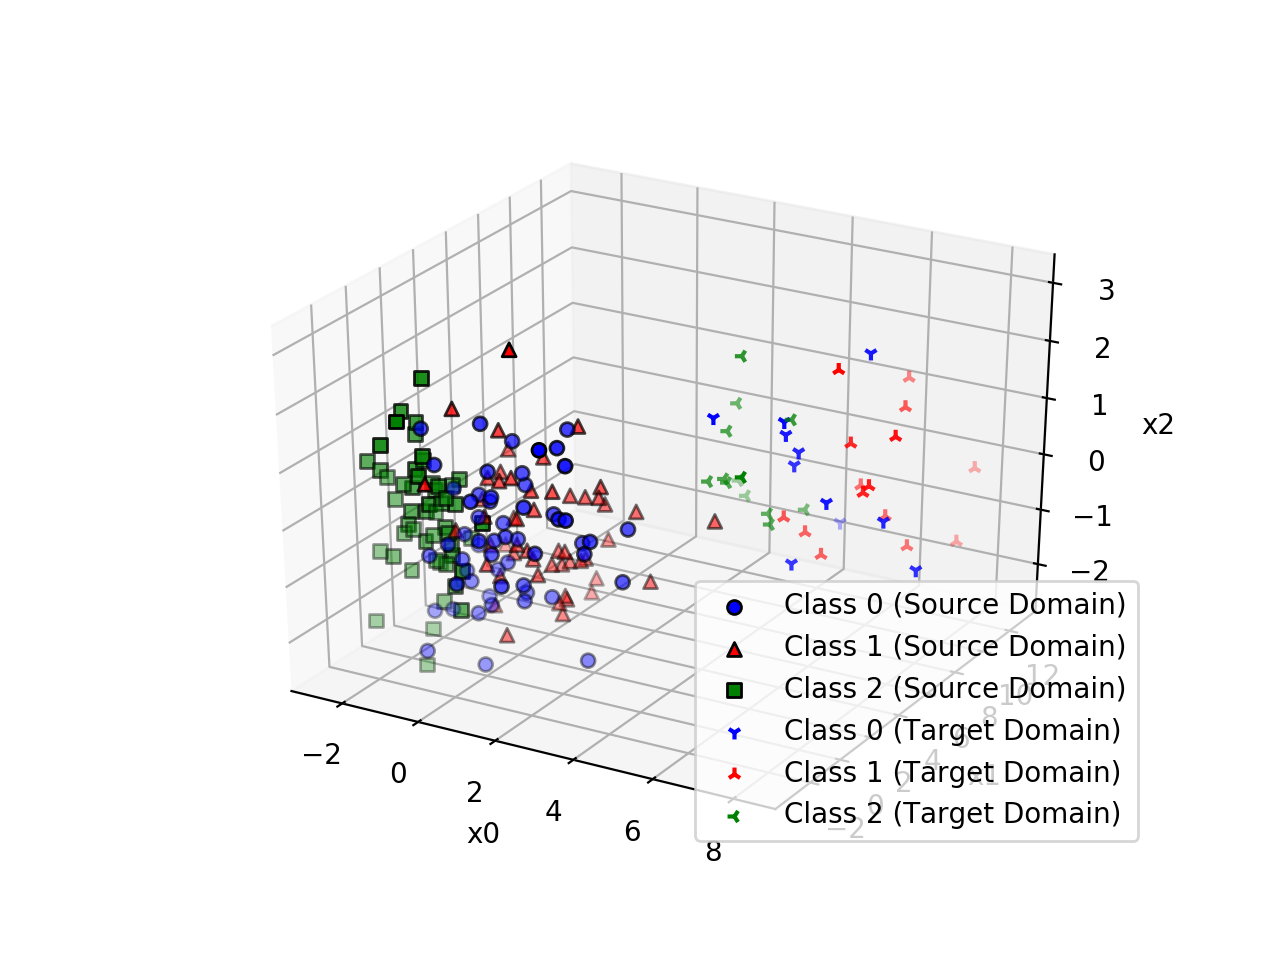

In [15]:
# Visualize in graph
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualize source domain
X = X_src_df
y = y_src_df
ax.scatter(X[(y.y == 0)]['x0'], 
           X[(y.y == 0)]['x1'], 
           X[(y.y == 0)]['x2'], 
           marker='o', c = 'blue' , s=25, edgecolor='k', label ='Class 0 (Source Domain)' )

ax.scatter(X[(y.y == 1)]['x0'], 
           X[(y.y == 1)]['x1'], 
           X[(y.y == 1)]['x2'], 
           marker='^', c = 'red' , s=25, edgecolor='k', label ='Class 1 (Source Domain)' )

ax.scatter(X[(y.y == 2)]['x0'], 
           X[(y.y == 2)]['x1'], 
           X[(y.y == 2)]['x2'], 
           marker='s', c = 'green' , s=25, edgecolor='k', label ='Class 2 (Source Domain)' )


# Visualize target domain
X = X_tgt_df
y = y_tgt_df
ax.scatter(X[(y.y == 0)]['x0'], 
           X[(y.y == 0)]['x1'], 
           X[(y.y == 0)]['x2'], 
           marker='1', c = 'blue' , s=25, edgecolor='k', label ='Class 0 (Target Domain)' )

ax.scatter(X[(y.y == 1)]['x0'], 
           X[(y.y == 1)]['x1'], 
           X[(y.y == 1)]['x2'], 
           marker='2', c = 'red' , s=25, edgecolor='k', label ='Class 1 (Target Domain)' )
 
ax.scatter(X[(y.y == 2)]['x0'], 
           X[(y.y == 2)]['x1'], 
           X[(y.y == 2)]['x2'], 
           marker='3', c = 'green' , s=25, edgecolor='k', label ='Class 2 (Target Domain)' )


ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('x2')

plt.legend()
plt.show()


In [16]:
print ('len(X_src_df) = %d' % len(X_src_df))
print ('len(X_tgt_df) = %d' % len(X_tgt_df))
print()
print ('len(X_src_train_df) = %d' % len(X_src_train_df))
print ('len(X_src_test_df) = %d' % len(X_src_test_df))
print()
print ('len(X_tgt_train_df) = %d' % len(X_tgt_train_df))
print ('len(X_tgt_test_df) = %d' % len(X_tgt_test_df))


len(X_src_df) = 160
len(X_tgt_df) = 40

len(X_src_train_df) = 128
len(X_src_test_df) = 32

len(X_tgt_train_df) = 12
len(X_tgt_test_df) = 28


## Source-Only Model

In [17]:
# Create model
src_clf = SVC()

# Train
src_clf.fit(X_src_train_df, y_src_train_df)

# Evaluate
src_train_score = src_clf.score(X_src_train_df, y_src_train_df)
src_test_score = src_clf.score(X_tgt_test_df, y_tgt_test_df)

print('src_train_score = %0.4f' % src_train_score)
print('src_test_score = %0.4f' % src_test_score)



src_train_score = 0.8594
src_test_score = 0.2143


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Target-Only Model

In [18]:
# Create model
tgt_clf = SVC()

# Train
tgt_clf.fit(X_tgt_train_df, y_tgt_train_df)

# Evaluate
tgt_train_score = tgt_clf.score(X_tgt_train_df, y_tgt_train_df)
tgt_test_score = tgt_clf.score(X_tgt_test_df, y_tgt_test_df)

print('tgt_train_score = %0.4f' % tgt_train_score)
print('tgt_test_score = %0.4f' % tgt_test_score)

tgt_train_score = 0.6667
tgt_test_score = 0.6071


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Frustratingly Easy Domain Adaptation Model

In [19]:
#
# Prepare train _df
#
X1 =  pd.concat( [X_src_train_df.add_prefix('g_'), 
                 X_src_train_df.add_prefix('s_')], 
                 axis = 1)

X2 =  pd.concat( [X_tgt_train_df.add_prefix('g_'), 
                 X_tgt_train_df.add_prefix('t_')], 
                 axis = 1)

X_feda_train_df = pd.concat([X1, X2], axis=0, ignore_index=True).fillna(0)
y_feda_train_df = pd.concat([y_src_train_df, y_tgt_train_df], axis=0, ignore_index=True)
 
#
# Prepare test df
#
X3 = pd.DataFrame(columns = X_feda_train_df.columns)
X4 = pd.concat( [X_tgt_test_df.add_prefix('g_'), 
                 X_tgt_test_df.add_prefix('t_')], 
                 axis = 1)

X_feda_test_df = pd.concat([X3, X4], axis=0, ignore_index=True).fillna(0)
y_feda_test_df = y_tgt_test_df

#
# ML
#
# Model
feda_clf = SVC()

# Train
feda_clf.fit(X_feda_train_df, y_feda_train_df)

# Evaluate
feda_train_score = feda_clf.score(X_feda_train_df, y_feda_train_df)
feda_test_score = feda_clf.score(X_feda_test_df, y_feda_test_df)

print('feda_train_score = %0.4f' % feda_train_score)
print('feda_test_score = %0.4f' % feda_test_score)

feda_train_score = 0.8214
feda_test_score = 0.6429


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
X_feda_test_df

,g_x0,g_x1,g_x2,s_x0,s_x1,s_x2,t_x0,t_x1,t_x2
0,3.974375,5.700279,0.181866,0,0,0,3.974375,5.700279,0.181866
1,5.014422,6.856049,0.971571,0,0,0,5.014422,6.856049,0.971571
2,6.063081,9.700642,2.060748,0,0,0,6.063081,9.700642,2.060748
3,3.304690,8.246046,-0.326024,0,0,0,3.304690,8.246046,-0.326024
4,5.305395,9.601970,1.687142,0,0,0,5.305395,9.601970,1.687142
5,3.599177,7.975419,-0.510016,0,0,0,3.599177,7.975419,-0.510016
6,5.777663,7.356030,-1.129707,0,0,0,5.777663,7.356030,-1.129707
7,6.485090,8.227834,-0.066080,0,0,0,6.485090,8.227834,-0.066080
8,5.855997,9.042123,0.570599,0,0,0,5.855997,9.042123,0.570599
9,6.814321,9.495639,0.751387,0,0,0,6.814321,9.495639,0.751387


In [21]:
X_feda_train_df

,g_x0,g_x1,g_x2,s_x0,s_x1,s_x2,t_x0,t_x1,t_x2
0,1.113465,-1.275100,0.035264,1.113465,-1.275100,0.035264,0.000000,0.000000,0.000000
1,-1.076458,-1.026221,-0.420984,-1.076458,-1.026221,-0.420984,0.000000,0.000000,0.000000
2,-0.910875,-1.676913,0.869606,-0.910875,-1.676913,0.869606,0.000000,0.000000,0.000000
3,0.463155,-2.433226,-0.444293,0.463155,-2.433226,-0.444293,0.000000,0.000000,0.000000
4,-1.122574,-0.844539,0.071566,-1.122574,-0.844539,0.071566,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
135,7.706011,12.771528,-0.238948,0.000000,0.000000,0.000000,7.706011,12.771528,-0.238948
136,3.705806,7.319731,2.075401,0.000000,0.000000,0.000000,3.705806,7.319731,2.075401
137,5.115146,6.461768,1.277677,0.000000,0.000000,0.000000,5.115146,6.461768,1.277677
138,3.698926,5.159139,0.254421,0.000000,0.000000,0.000000,3.698926,5.159139,0.254421


In [22]:
y_feda_train_df

,y
0,0
1,2
2,2
3,2
4,2
...,...
135,1
136,2
137,0
138,2


In [23]:
feda_clf.predict(X_feda_test_df)

array([2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1,
       1, 2, 2, 2, 1, 2])

In [24]:
y_feda_test_df

,y
159,2
156,0
124,0
8,2
169,1
41,2
82,1
111,1
141,1
110,1


## Result

In [25]:
print ('len(X_src_df) = %d' % len(X_src_df))
print ('len(X_tgt_df) = %d' % len(X_tgt_df))
print()
print ('len(X_src_train_df) = %d' % len(X_src_train_df))
print ('len(X_src_test_df) = %d' % len(X_src_test_df))
print()
print ('len(X_tgt_train_df) = %d' % len(X_tgt_train_df))
print ('len(X_tgt_test_df) = %d' % len(X_tgt_test_df))

len(X_src_df) = 160
len(X_tgt_df) = 40

len(X_src_train_df) = 128
len(X_src_test_df) = 32

len(X_tgt_train_df) = 12
len(X_tgt_test_df) = 28


In [26]:
print('src_train_score = %0.4f' % src_train_score)
print('src_test_score = %0.4f' % src_test_score)
print()

print('tgt_train_score = %0.4f' % tgt_train_score)
print('tgt_test_score = %0.4f' % tgt_test_score)
print() 

print('feda_train_score = %0.4f' % feda_train_score)
print('feda_test_score = %0.4f' % feda_test_score)

src_train_score = 0.8594
src_test_score = 0.2143

tgt_train_score = 0.6667
tgt_test_score = 0.6071

feda_train_score = 0.8214
feda_test_score = 0.6429
